### 【問題1】公式Exampleを分担して実行

In [15]:
#
# 公式チュートリアル
#

import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # feature scalingのために255で割る
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
predictions = model(x_train[:1]).numpy()
tf.nn.softmax(predictions).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
# 学習
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])
probability_model(x_test[:5])

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2947 - accuracy: 0.9143: 1s - loss: 0.4 - ETA: 1s - loss: 0.3709  - ETA: 0s - loss: 0.3
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1436 - accuracy: 0.9569: 0s - loss: 0.1450 - ac
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1073 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0861 - accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0725 - accuracy: 0.9775: 0s - loss: 0.0722 - accuracy: 
313/313 - 0s - loss: 0.0719 - accuracy: 0.9787


### 【問題2】Iris（2値分類）をKerasで学習

In [58]:
import tensorflow as tf
import keras
from sklearn import datasets
from sklearn import preprocessing
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import pandas as pd

# データ準備
iris_dataset = datasets.load_iris()
x = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.Series(iris_dataset.target, name="y")
df_train = x.join(y).query('y in (1,2)') # yを2値に変換
x = df_train.drop(["y"],  axis=1)
y = df_train["y"]

# 正規化 (精度向上のため)
x = preprocessing.scale(x)

# ワンホットエンコーディング
y = np_utils.to_categorical(y)

# 分割 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# モデルの初期化
model = Sequential()
# Denseの第一引数は隠れ層のニューロン数を、
# 第二引数は入力層（がくの長さ、幅、花弁の長さ、幅）をタプル形式で指定
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('relu'))
# ３種の分類をしたいので出力層は3を指定
model.add(Dense(3))
model.add(Activation('softmax')) # Activationは活性化関数
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 学習
# epochs: 整数でモデルを訓練するエポック数（x・y全データの反復）
# batch_size: 設定したサンプル数ごとに勾配の更新
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=1)

# 推定/評価
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('アヤメ 2値分類 Accuracy', '{:.2f}'.format(accuracy))

Epoch 1/10
75/75 [==============================] - 1s 634us/step - loss: 1.2447 - accuracy: 0.4325
Epoch 2/10
75/75 [==============================] - 0s 604us/step - loss: 0.9525 - accuracy: 0.5011
Epoch 3/10
75/75 [==============================] - 0s 568us/step - loss: 0.7082 - accuracy: 0.7875
Epoch 4/10
75/75 [==============================] - 0s 630us/step - loss: 0.5614 - accuracy: 0.8936
Epoch 5/10
75/75 [==============================] - 0s 612us/step - loss: 0.4383 - accuracy: 0.8517
Epoch 6/10
75/75 [==============================] - 0s 806us/step - loss: 0.3427 - accuracy: 0.9326
Epoch 7/10
75/75 [==============================] - 0s 727us/step - loss: 0.3141 - accuracy: 0.9520
Epoch 8/10
75/75 [==============================] - 0s 608us/step - loss: 0.2823 - accuracy: 0.9318
Epoch 9/10
75/75 [==============================] - 0s 621us/step - loss: 0.2615 - accuracy: 0.9250
Epoch 10/10
75/75 [==============================] - 0s 599us/step - loss: 0.1688 - accuracy: 0.9761

### 【問題3】Iris（多値分類）をKerasで学習

In [57]:
# 参考: https://chusotsu-program.com/tensorflow-keras-iris/

import tensorflow as tf
import keras
from sklearn import datasets
from sklearn import preprocessing
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Activation
 
iris = datasets.load_iris()
x = iris.data
y = iris.target

# 正規化 (精度向上のため)
x = preprocessing.scale(x)

# ワンホットエンコーディング
y = np_utils.to_categorical(y)

# 分割 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# モデルの初期化
model = Sequential()
# Denseの第一引数は隠れ層のニューロン数を、
# 第二引数は入力層（がくの長さ、幅、花弁の長さ、幅）をタプル形式で指定
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('relu'))
# ３種の分類をしたいので出力層は3を指定
model.add(Dense(3))
model.add(Activation('softmax')) # Activationは活性化関数


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# epochs: 整数でモデルを訓練するエポック数（x・y全データの反復）
# batch_size: 設定したサンプル数ごとに勾配の更新
model.fit(x_train, y_train, epochs=30, batch_size=1, verbose=1)

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy', '{:.2f}'.format(accuracy))

Epoch 1/30
112/112 [==============================] - 1s 635us/step - loss: 1.1382 - accuracy: 0.3514
Epoch 2/30
112/112 [==============================] - 0s 624us/step - loss: 0.7674 - accuracy: 0.8693
Epoch 3/30
112/112 [==============================] - 0s 589us/step - loss: 0.5451 - accuracy: 0.9092
Epoch 4/30
112/112 [==============================] - 0s 584us/step - loss: 0.4070 - accuracy: 0.8938
Epoch 5/30
112/112 [==============================] - 0s 662us/step - loss: 0.3254 - accuracy: 0.9040
Epoch 6/30
112/112 [==============================] - 0s 631us/step - loss: 0.3767 - accuracy: 0.8558
Epoch 7/30
112/112 [==============================] - 0s 585us/step - loss: 0.3342 - accuracy: 0.8506
Epoch 8/30
112/112 [==============================] - 0s 590us/step - loss: 0.2994 - accuracy: 0.9002
Epoch 9/30
112/112 [==============================] - 0s 604us/step - loss: 0.2745 - accuracy: 0.9038
Epoch 10/30
112/112 [==============================] - 0s 580us/step - loss: 0.253

### 【問題4】House PricesをKerasで学習

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.python import keras as K
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_info_rows', 6)

# データセット準備
df_base = pd.read_csv("../data/house-prices-advanced-regression-techniques/train.csv")
feature_names = ["GrLivArea", "YearBuilt"]
y_name = "SalePrice"
x = df_base.loc[:, feature_names].values
y = df_base[y_name].values

# 前処理
# 訓練データとテストデータに分ける
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)

# モデル準備
model = K.Sequential([
    # データの正規化（入力は１３の特徴量）
    K.layers.BatchNormalization(input_shape=(2,)),
    # １層目のニューラルネットワーク
    #   活性化関数はsoftplus
    #   kernel_regularizer正則化=>重みに制限をかける=>過学習防止
    K.layers.Dense(units=2, activation="softplus", kernel_regularizer="l1"),
    # ２層目のニューラルネットワーク
    K.layers.Dense(units=1)
])
# loss=最小二乗法  optimizer=最適化に確率的勾配降下法
model.compile(loss="mean_absolute_error", optimizer="adam")

# 学習
model.fit(x_train, y_train, epochs=10)

# 予測を行う
predicts = model.predict(x_test)

# 評価
print(model.evaluate(x_test, y_test, verbose=1))

# 結果をグラフ表示する。
# result = pd.DataFrame({
#     "predict": np.reshape(predicts, (-1,)),   # 2次元データを1次元データに変換
#     "actual": y_test
# })
# result.plot.scatter(x="actual", y="predict")
# plt.show()

Epoch 1/10
37/37 [==============================] - 0s 784us/step - loss: 180808.8281
Epoch 2/10
37/37 [==============================] - 0s 738us/step - loss: 180808.7188
Epoch 3/10
37/37 [==============================] - 0s 687us/step - loss: 180808.5625
Epoch 4/10
37/37 [==============================] - 0s 699us/step - loss: 180808.3594
Epoch 5/10
37/37 [==============================] - 0s 636us/step - loss: 180808.1875
Epoch 6/10
37/37 [==============================] - 0s 705us/step - loss: 180807.9688
Epoch 7/10
37/37 [==============================] - 0s 718us/step - loss: 180807.7344
Epoch 8/10
37/37 [==============================] - 0s 635us/step - loss: 180807.4688
Epoch 9/10
37/37 [==============================] - 0s 723us/step - loss: 180807.1719
Epoch 10/10
10/10 [==============================] - 0s 669us/step - loss: 181369.5469


181369.546875

### 【問題5】MNISTをKerasで学習

In [22]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

# PrefetchDataset
mnist_dataset, mnist_info = tfds.load(name="mnist", with_info=True, as_supervised=True)
# PrefetchDataset
mnist_train, mnist_test = mnist_dataset["train"], mnist_dataset['test']

# EagerTensor
# なぜtf.castを通しているのかは現段階では不明、おそらくtf内で計算しやすいオブジェクトにしているのではなかろうか
num_valid_samples = tf.cast(0.1 * mnist_info.splits['train'].num_examples, tf.int64)
num_test_samples = tf.cast(mnist_info.splits['test'].num_examples, tf.int64)


# Feature Scaling 0~255 => 0~1 にスケーリングする
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image, label


# MapDataset
scaled_train_and_valid_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)

# train/validにsplit
BUFFER_SIZE = 10000 # メモリ対策
shuffled_train_and_valid_data = scaled_train_and_valid_data.shuffle(BUFFER_SIZE)
valid_data = shuffled_train_and_valid_data.take(num_valid_samples)
train_data = shuffled_train_and_valid_data.skip(num_valid_samples)


# 負荷対策
BATCH_SIZE = 100
train_data = train_data.batch(BATCH_SIZE)
valid_data = valid_data.batch(num_valid_samples)
test_data = test_data.batch(num_test_samples)

valid_inputs, valid_targets = next(iter(valid_data))


#
# モデルの作成
# 隠れ層: 2層
# 合計: 4層
#
input_size = 784 # 28 * 28 * 1
output_size = 10
hidden_layer_size = 50
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), # 1列に変換
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),
    tf.keras.layers.Dense(output_size, activation='softmax'),
])
model.compile(optimizer='adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 学習
result = model.fit(train_data, epochs=10, validation_data=(valid_inputs, valid_targets), verbose =2)

Epoch 1/10
540/540 - 3s - loss: 1.6497 - accuracy: 0.5630 - val_loss: 1.2353 - val_accuracy: 0.7325
Epoch 2/10
540/540 - 2s - loss: 1.0518 - accuracy: 0.7779 - val_loss: 0.9222 - val_accuracy: 0.7998
Epoch 3/10
540/540 - 2s - loss: 0.8369 - accuracy: 0.8205 - val_loss: 0.7736 - val_accuracy: 0.8290
Epoch 4/10
540/540 - 2s - loss: 0.7214 - accuracy: 0.8414 - val_loss: 0.6839 - val_accuracy: 0.8455
Epoch 5/10
540/540 - 2s - loss: 0.6463 - accuracy: 0.8543 - val_loss: 0.6226 - val_accuracy: 0.8575
Epoch 6/10
540/540 - 2s - loss: 0.5948 - accuracy: 0.8626 - val_loss: 0.5774 - val_accuracy: 0.8637
Epoch 7/10
540/540 - 2s - loss: 0.5547 - accuracy: 0.8699 - val_loss: 0.5425 - val_accuracy: 0.8700
Epoch 8/10
540/540 - 2s - loss: 0.5226 - accuracy: 0.8758 - val_loss: 0.5145 - val_accuracy: 0.8755
Epoch 9/10
540/540 - 2s - loss: 0.4978 - accuracy: 0.8796 - val_loss: 0.4920 - val_accuracy: 0.8790
Epoch 10/10
540/540 - 2s - loss: 0.4759 - accuracy: 0.8836 - val_loss: 0.4728 - val_accuracy: 0.8822

1/1 [==============================] - 1s 668ms/step - loss: 0.4508 - accuracy: 0.8932
Test loss: 0.45. Test accuracy: 89.32%


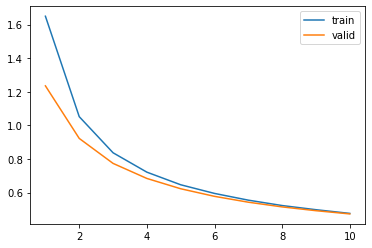

In [23]:
# 評価
test_loss, test_accuracy = model.evaluate(test_data)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

loss_list = result.history['loss']
loss_list_val = result.history['val_loss']

import matplotlib.pyplot as plt
plot_x = [i for i in range(1, len(loss_list)+1)]
plt.plot(plot_x, loss_list, label='train')
plt.plot(plot_x, loss_list_val, label='valid')
plt.legend()
plt.show()